Họ và tên: Phạm Đức Thể

MSSV: 19522253

Lớp: DS201.M11.2

Buổi 03 - 27/10/2021

# LAB 03 - MẠNG NEURAL TÍCH CHẬP

## Setup

In [1]:
# Check GPU
!nvidia-smi

Fri Oct 29 05:41:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Import các thư viện cần thiết

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn


from keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from keras.layers import Dense, Activation, Input, MaxPooling2D, Conv2D, Flatten, Dropout, AveragePooling2D
from keras.models import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

sn.set() # Set theme

### Load bộ dữ liệu MNIST

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()

### Chuẩn bị dữ liệu

In [4]:
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, 
                                                  test_size=0.1)

In [5]:
print('X_train = {}'.format(X_train.shape))
print('y_train = {}'.format(y_train.shape))
print('X_dev = {}'.format(X_dev.shape))
print('y_dev = {}'.format(y_dev.shape))
print('X_test = {}'.format(X_test.shape))
print('y_test = {}'.format(y_test.shape))

X_train = (54000, 28, 28)
y_train = (54000,)
X_dev = (6000, 28, 28)
y_dev = (6000,)
X_test = (10000, 28, 28)
y_test = (10000,)


In [6]:
X_train_expanded = np.expand_dims(X_train, axis=3) 
X_dev_expanded = np.expand_dims(X_dev, axis=3) 
X_test_expanded = np.expand_dims(X_test, axis=3) 

In [7]:
y_train_new = to_categorical(y_train, num_classes = 10)
y_dev_new = to_categorical(y_dev, num_classes = 10)

In [8]:
print('X_train_expanded = {}'.format(X_train_expanded.shape))
print('y_train_new = {}'.format(y_train_new.shape))
print('X_dev_expanded = {}'.format(X_dev_expanded.shape))
print('y_dev_new = {}'.format(y_dev_new.shape))
print('X_test_expanded = {}'.format(X_test_expanded.shape))
print('y_test = {}'.format(y_test.shape))

X_train_expanded = (54000, 28, 28, 1)
y_train_new = (54000, 10)
X_dev_expanded = (6000, 28, 28, 1)
y_dev_new = (6000, 10)
X_test_expanded = (10000, 28, 28, 1)
y_test = (10000,)


## **Bài 1**:
Hiện thực mô hình ở phần 3, sử dụng hàm activation relu cho 2 lớp CONV. Thực hiện huấn luyện lại mô hình và xem kết quả? Cho biết độ chính xác và đồ thị học của mô hình. 

### Xây dựng mạng neural bằng keras

In [9]:
# Khởi tạo model
model_1 = Sequential() 

model_1.add(Input(shape=(28, 28, 1))) 
model_1.add(Conv2D(32, padding='valid', kernel_size=(3, 3), 
                   activation='relu')) 
model_1.add(MaxPooling2D(pool_size=(2, 2))) 

model_1.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
model_1.add(MaxPooling2D(pool_size=(2, 2))) 

model_1.add(Flatten()) 
model_1.add(Dense(10, activation='softmax'))

In [10]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
____________________________________________________

### Huấn luyện model

In [11]:
# Compile model
Optimizer = Adam(learning_rate=1e-3)
Loss = CategoricalCrossentropy()
model_1.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [12]:
# Training model
history_1 = model_1.fit(X_train_expanded, y_train_new, 
                        validation_data=(X_dev_expanded, y_dev_new),
                        batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 6s 10ms/step - loss: 0.8989 - accuracy: 0.9060 - val_loss: 0.1338 - val_accuracy: 0.9622
Epoch 2/30
422/422 [==============================] - 3s 8ms/step - loss: 0.1020 - accuracy: 0.9717 - val_loss: 0.1091 - val_accuracy: 0.9685
Epoch 3/30
422/422 [==============================] - 3s 8ms/step - loss: 0.0641 - accuracy: 0.9814 - val_loss: 0.0837 - val_accuracy: 0.9772
Epoch 4/30
422/422 [==============================] - 4s 8ms/step - loss: 0.0468 - accuracy: 0.9867 - val_loss: 0.1147 - val_accuracy: 0.9730
Epoch 5/30
422/422 [==============================] - 4s 8ms/step - loss: 0.0373 - accuracy: 0.9886 - val_loss: 0.0880 - val_accuracy: 0.9777
Epoch 6/30
422/422 [==============================] - 4s 8ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0772 - val_accuracy: 0.9812
Epoch 7/30
422/422 [==============================] - 3s 8ms/step - loss: 0.0290 - accuracy: 0.9909 - val_loss: 0.0962 - val_accuracy: 0.9750
Epoch

### Visualization Loss & Accuracy

#### Accuracy

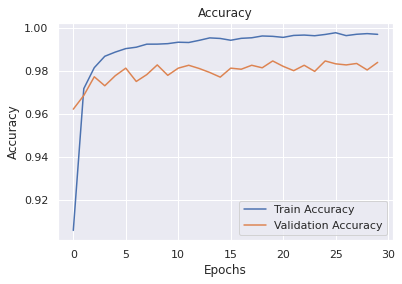

In [13]:
plt.plot(history_1.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Loss

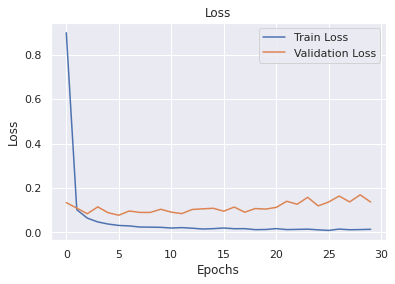

In [14]:
plt.plot(history_1.history['loss'], label = 'Train Loss')
plt.plot(history_1.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Đánh giá model

In [15]:
y_pred = model_1.predict(X_test_expanded)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 98.76%


## **Bài 2**:
Hiện thực mô hình ở phần 3, sử dụng hàm activation tanh cho 2 lớp CONV. Thực hiện huấn luyện lại mô hình và xem kết quả? Cho biết độ chính xác và đồ thị học của mô hình. 

### Xây dựng mạng neural bằng keras

In [16]:
# Khởi tạo model
model_2 = Sequential() 

model_2.add(Input(shape=(28, 28, 1))) 
model_2.add(Conv2D(32, padding='valid', kernel_size=(3, 3), 
                   activation='tanh')) 
model_2.add(MaxPooling2D(pool_size=(2, 2))) 

model_2.add(Conv2D(64, kernel_size=(3, 3), activation='tanh')) 
model_2.add(MaxPooling2D(pool_size=(2, 2))) 

model_2.add(Flatten()) 
model_2.add(Dense(10, activation='softmax'))

In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

### Huấn luyện model

In [18]:
# Compile model
Optimizer = Adam(learning_rate=1e-3)
Loss = CategoricalCrossentropy()
model_2.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [19]:
# Training model
history_2 = model_2.fit(X_train_expanded, y_train_new, 
                        validation_data=(X_dev_expanded, y_dev_new),
                        batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 5s 10ms/step - loss: 0.2264 - accuracy: 0.9363 - val_loss: 0.0900 - val_accuracy: 0.9742
Epoch 2/30
422/422 [==============================] - 3s 8ms/step - loss: 0.0638 - accuracy: 0.9810 - val_loss: 0.0670 - val_accuracy: 0.9812
Epoch 3/30
422/422 [==============================] - 3s 8ms/step - loss: 0.0461 - accuracy: 0.9863 - val_loss: 0.0650 - val_accuracy: 0.9812
Epoch 4/30
422/422 [==============================] - 3s 8ms/step - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.0594 - val_accuracy: 0.9827
Epoch 5/30
422/422 [==============================] - 3s 8ms/step - loss: 0.0283 - accuracy: 0.9921 - val_loss: 0.0566 - val_accuracy: 0.9822
Epoch 6/30
422/422 [==============================] - 3s 8ms/step - loss: 0.0234 - accuracy: 0.9932 - val_loss: 0.0569 - val_accuracy: 0.9850
Epoch 7/30
422/422 [==============================] - 3s 8ms/step - loss: 0.0187 - accuracy: 0.9947 - val_loss: 0.0574 - val_accuracy: 0.9827
Epoch

### Visualization Loss & Accuracy

#### Accuracy

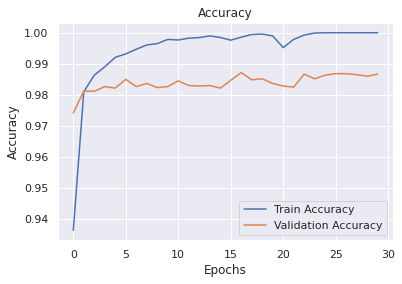

In [20]:
plt.plot(history_2.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Loss

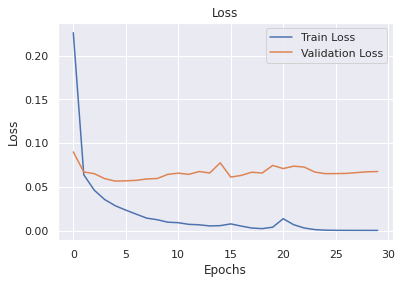

In [21]:
plt.plot(history_2.history['loss'], label = 'Train Loss')
plt.plot(history_2.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Đánh giá model

In [22]:
y_pred = model_2.predict(X_test_expanded)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 98.8%


## **Bài 3**: 
Thực hiện như bài 1, nhưng thêm vào lớp Dropout với giá trị p = 0.5 trước lớp 
Dense. Huấn luyện lại mô hình và cho biết kết quả (vẽ đồ thị học của mô hình). 

### Xây dựng mạng neural bằng keras

In [23]:
# Khởi tạo model
model_3 = Sequential() 

model_3.add(Input(shape=(28, 28, 1))) 
model_3.add(Conv2D(32, padding='valid', kernel_size=(3, 3), 
                   activation='relu')) 
model_3.add(MaxPooling2D(pool_size=(2, 2))) 

model_3.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
model_3.add(MaxPooling2D(pool_size=(2, 2))) 

model_3.add(Flatten()) 
model_3.add(Dropout(0.5))
model_3.add(Dense(10, activation='softmax'))

In [24]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

### Huấn luyện model

In [25]:
# Compile model
Optimizer = Adam(learning_rate=1e-3)
Loss = CategoricalCrossentropy()
model_3.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [26]:
# Training model
history_3 = model_3.fit(X_train_expanded, y_train_new, 
                        validation_data=(X_dev_expanded, y_dev_new),
                        batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 4s 9ms/step - loss: 1.4119 - accuracy: 0.8249 - val_loss: 0.1232 - val_accuracy: 0.9620
Epoch 2/30
422/422 [==============================] - 3s 8ms/step - loss: 0.1926 - accuracy: 0.9411 - val_loss: 0.0818 - val_accuracy: 0.9753
Epoch 3/30
422/422 [==============================] - 3s 8ms/step - loss: 0.1518 - accuracy: 0.9537 - val_loss: 0.0742 - val_accuracy: 0.9785
Epoch 4/30
422/422 [==============================] - 3s 8ms/step - loss: 0.1242 - accuracy: 0.9631 - val_loss: 0.0652 - val_accuracy: 0.9825
Epoch 5/30
422/422 [==============================] - 3s 8ms/step - loss: 0.1073 - accuracy: 0.9677 - val_loss: 0.0674 - val_accuracy: 0.9805
Epoch 6/30
422/422 [==============================] - 3s 8ms/step - loss: 0.0968 - accuracy: 0.9701 - val_loss: 0.0595 - val_accuracy: 0.9835
Epoch 7/30
422/422 [==============================] - 3s 8ms/step - loss: 0.0906 - accuracy: 0.9724 - val_loss: 0.0577 - val_accuracy: 0.9835
Epoch 

### Visualization Loss & Accuracy

#### Accuracy

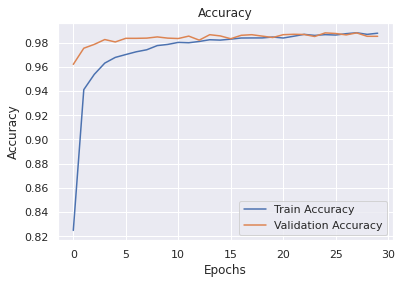

In [27]:
plt.plot(history_3.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Loss

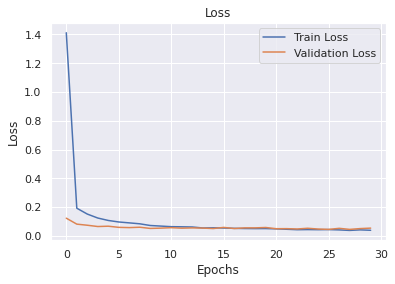

In [28]:
plt.plot(history_3.history['loss'], label = 'Train Loss')
plt.plot(history_3.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Đánh giá model

In [29]:
y_pred = model_3.predict(X_test_expanded)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 98.97%


## **Bài 4**: 
Hiện thực lại mô hình <font color='red'>**LeNET-5**</font> theo hướng dẫn ở mục 4. Cho biết kết quả độ chính xác.

<font color='red'>**LeNET-5 Architecture**</font>


<img src="https://cdn-images-1.medium.com/max/800/1*lvvWF48t7cyRWqct13eU0w.jpeg" width="800" alt="LeNET-5" />



### Xây dựng mạng neural bằng keras

In [30]:
# Khởi tạo model
model_4 = Sequential() 

model_4.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', 
                   activation='relu',input_shape=(28,28,1))) 
model_4.add(AveragePooling2D(strides=2, pool_size=(2, 2))) 

model_4.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', 
                   activation='relu')) 
model_4.add(AveragePooling2D(strides=2, pool_size=(2, 2))) 

model_4.add(Flatten()) 
model_4.add(Dense(120, activation='relu')) 
model_4.add(Dense(84, activation='relu')) 
model_4.add(Dense(10, activation='softmax'))

In [31]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

### Huấn luyện model

In [32]:
# Compile model
Optimizer = Adam(learning_rate=1e-3)
Loss = CategoricalCrossentropy()
model_4.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [33]:
# Training model
history_4 = model_4.fit(X_train_expanded, y_train_new, 
                        validation_data=(X_dev_expanded, y_dev_new),
                        batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 4s 7ms/step - loss: 0.3388 - accuracy: 0.9178 - val_loss: 0.1149 - val_accuracy: 0.9647
Epoch 2/30
422/422 [==============================] - 3s 6ms/step - loss: 0.0721 - accuracy: 0.9779 - val_loss: 0.0851 - val_accuracy: 0.9732
Epoch 3/30
422/422 [==============================] - 3s 7ms/step - loss: 0.0489 - accuracy: 0.9850 - val_loss: 0.0767 - val_accuracy: 0.9765
Epoch 4/30
422/422 [==============================] - 3s 6ms/step - loss: 0.0387 - accuracy: 0.9880 - val_loss: 0.0649 - val_accuracy: 0.9822
Epoch 5/30
422/422 [==============================] - 3s 6ms/step - loss: 0.0317 - accuracy: 0.9898 - val_loss: 0.0574 - val_accuracy: 0.9817
Epoch 6/30
422/422 [==============================] - 3s 6ms/step - loss: 0.0274 - accuracy: 0.9910 - val_loss: 0.0607 - val_accuracy: 0.9822
Epoch 7/30
422/422 [==============================] - 3s 7ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.0573 - val_accuracy: 0.9850
Epoch 

### Visualization Loss & Accuracy

#### Accuracy

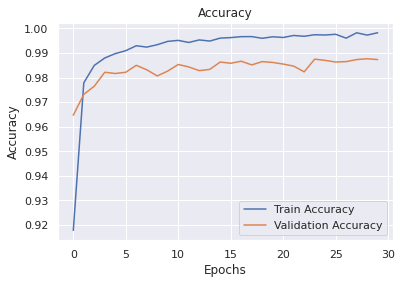

In [34]:
plt.plot(history_4.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_4.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Loss

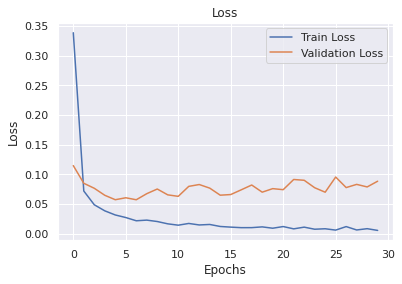

In [35]:
plt.plot(history_4.history['loss'], label = 'Train Loss')
plt.plot(history_4.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Đánh giá model

In [36]:
y_pred = model_4.predict(X_test_expanded)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 98.93%


## **Bài 5**: 
Lưu lại mô hình ở bài 3 thành file h5

In [37]:
# Luu model bai 3
model_4.save('LeNET-5.h5')

##**Bài 6**:*
Hiện thực mạng <font color='red'>**AlexNET**</font> với bộ dữ liệu MNIST

Thông tin mạng như sau:

| STT | Tên | Thông số | Hàm activation |
| ----- | ----- | ----- | ----- |
| 1 | CONV2D | num filter: 96 <br/> size: 12x12 <br/> input shape: (28,28,1) <br/> padding:same <br/> strides: 4  | relu |
| 2 | MaxPooling2D | size: 3x3 <br/> padding:same <br/> strides: 2  |  |
| 3 | CONV2D | num filter: 256 <br/> size: 5x5 <br/> strides: 1  | relu |
| 4 | MaxPooling2D | size: 3x3 <br/> padding:same <br/> strides: 2  |  |
| 5 | CONV2D | num filter: 384 <br/> size: 3x3 <br/> padding:same <br/> strides: 1  | relu |
| 6 | CONV2D | num filter: 384 <br/> size: 3x3 <br/> padding:same <br/> strides: 1  | relu |
| 7 | CONV2D | num filter: 256 <br/> size: 3x3 <br/> padding:same <br/> strides: 1  | relu |
| 8 | MaxPooling2D | size: 3x3 <br/> padding:same <br/> strides: 2  |  |
| 9 | Dropout | p=0.5 |  |
| 10 | Dense | num unit = 4096 | relu |
| 11 | Dense | num unit = 4096 | relu |
| 12 | Dense | num unit = 10 | softmax |

Loss: CategoricalCrossentropy 

Optimizer: Adam

<font color='red'>**AlexNET Architecture**</font>


<img src="https://neurohive.io/wp-content/uploads/2018/10/AlexNet-1.png" width="800" alt="AlexNET" />


<img src="https://neurohive.io/wp-content/uploads/2018/10/Capture-12.jpg" width="800" alt="AlexNET" />


### Xây dựng mạng neural bằng keras

In [38]:
# Khởi tạo model
model_5 = Sequential() 

model_5.add(Conv2D(filters=96, kernel_size=(12,12), padding='same', 
                   activation='relu',input_shape=(28,28,1), strides=(4,4)))
model_5.add(MaxPooling2D(strides=(2,2), pool_size=(3, 3), padding='same'))

model_5.add(Conv2D(filters=256, kernel_size=(5,5), padding='same',
                   activation='relu', strides=(1,1)))
model_5.add(MaxPooling2D(strides=(2,2), pool_size=(3, 3), padding='same'))

model_5.add(Conv2D(filters=384, kernel_size=(3,3), activation='relu', 
                   strides=(1,1), padding='same')) 

model_5.add(Conv2D(filters=384, kernel_size=(3,3), activation='relu', 
                   strides=(1,1), padding='same')) 

model_5.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', 
                   strides=(1,1), padding='same')) 
model_5.add(MaxPooling2D(strides=(2,2), pool_size=(3, 3), padding='same'))
model_5.add(Flatten()) 
model_5.add(Dropout(0.5))
model_5.add(Dense(4096, activation='relu')) 
model_5.add(Dense(4096, activation='relu')) 
model_5.add(Dense(10, activation='softmax'))

In [39]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 7, 7, 96)          13920     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 2, 2, 384)         885120    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 2, 2, 384)         1327488   
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 2, 2, 256)        

### Huấn luyện model

In [40]:
# Compile model
Optimizer = Adam(learning_rate=1e-4)
Loss = CategoricalCrossentropy()
model_5.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [41]:
# Training model
history_5 = model_5.fit(X_train_expanded, y_train_new, 
                        validation_data=(X_dev_expanded, y_dev_new),
                        batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 22s 47ms/step - loss: 0.3730 - accuracy: 0.8760 - val_loss: 0.1225 - val_accuracy: 0.9620
Epoch 2/30
422/422 [==============================] - 19s 45ms/step - loss: 0.1093 - accuracy: 0.9669 - val_loss: 0.1020 - val_accuracy: 0.9710
Epoch 3/30
422/422 [==============================] - 19s 45ms/step - loss: 0.0730 - accuracy: 0.9783 - val_loss: 0.0914 - val_accuracy: 0.9742
Epoch 4/30
422/422 [==============================] - 19s 45ms/step - loss: 0.0574 - accuracy: 0.9837 - val_loss: 0.0733 - val_accuracy: 0.9802
Epoch 5/30
422/422 [==============================] - 19s 45ms/step - loss: 0.0447 - accuracy: 0.9866 - val_loss: 0.0779 - val_accuracy: 0.9788
Epoch 6/30
422/422 [==============================] - 19s 45ms/step - loss: 0.0388 - accuracy: 0.9887 - val_loss: 0.0742 - val_accuracy: 0.9803
Epoch 7/30
422/422 [==============================] - 19s 44ms/step - loss: 0.0346 - accuracy: 0.9896 - val_loss: 0.0853 - val_accuracy:

### Visualization Loss & Accuracy

#### Accuracy

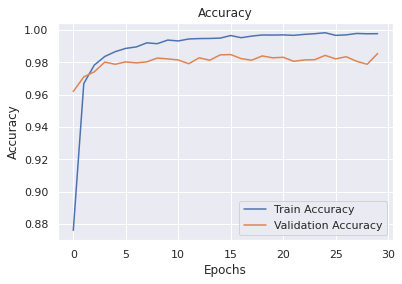

In [42]:
plt.plot(history_5.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_5.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Loss

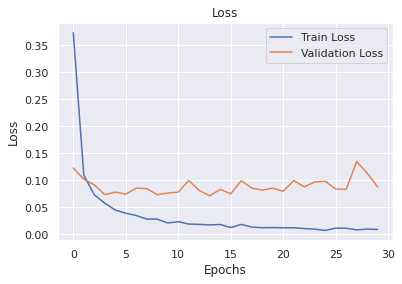

In [43]:
plt.plot(history_5.history['loss'], label = 'Train Loss')
plt.plot(history_5.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Đánh giá model

In [44]:
y_pred = model_5.predict(X_test_expanded)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 98.74%


### Lưu model

In [45]:
model_5.save('AlexNET.h5')

## **Bài 7**:*
Thực hiện các yêu cầu trên đối với bộ dữ liệu CIFAR10

### Setup

#### Import các thư viện cần thiết

In [46]:
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.datasets.cifar10 import load_data

#### Load bộ dữ liệu MNIST

In [47]:
(X_train_extra, y_train_extra), (X_test_extra, y_test_extra) = load_data()

#### Chuẩn bị dữ liệu

In [48]:
X_train_extra, X_dev_extra, y_train_extra, y_dev_extra = train_test_split(X_train_extra, 
                                                                          y_train_extra, 
                                                                          test_size=0.1)

In [49]:
print('X_train_extra = {}'.format(X_train_extra.shape))
print('y_train_extra = {}'.format(y_train_extra.shape))
print('X_dev_extra = {}'.format(X_dev_extra.shape))
print('y_dev_extra = {}'.format(y_dev_extra.shape))
print('X_test_extra = {}'.format(X_test_extra.shape))
print('y_test_extra = {}'.format(y_test_extra.shape))

X_train_extra = (45000, 32, 32, 3)
y_train_extra = (45000, 1)
X_dev_extra = (5000, 32, 32, 3)
y_dev_extra = (5000, 1)
X_test_extra = (10000, 32, 32, 3)
y_test_extra = (10000, 1)


In [50]:
y_train_extra_new = to_categorical(y_train_extra, num_classes = 10)
y_dev_extra_new = to_categorical(y_dev_extra, num_classes = 10)

In [51]:
print('X_train_extra = {}'.format(X_train_extra.shape))
print('y_train_extra_new = {}'.format(y_train_extra_new.shape))
print('X_dev_extra = {}'.format(X_dev_extra.shape))
print('y_dev_extra_new = {}'.format(y_dev_extra_new.shape))
print('X_test_extra = {}'.format(X_test_extra.shape))
print('y_test_extra = {}'.format(y_test_extra.shape))

X_train_extra = (45000, 32, 32, 3)
y_train_extra_new = (45000, 10)
X_dev_extra = (5000, 32, 32, 3)
y_dev_extra_new = (5000, 10)
X_test_extra = (10000, 32, 32, 3)
y_test_extra = (10000, 1)


### **Bài 7.1**:
Hiện thực mô hình ở phần 3, sử dụng hàm activation relu cho 2 lớp CONV. Thực hiện huấn luyện lại mô hình và xem kết quả? Cho biết độ chính xác và đồ thị học của mô hình. 

#### Xây dựng mạng neural bằng keras

In [52]:
# Khởi tạo model
model_6_1 = Sequential() 

model_6_1.add(Input(shape=(32, 32, 3))) 
model_6_1.add(Conv2D(64, padding='same', kernel_size=(3, 3), 
                     activation='relu', 
                     kernel_regularizer = l2 (0.01), 
                     bias_regularizer = l2 (0.01))) 
model_6_1.add(BatchNormalization())
model_6_1.add(MaxPooling2D(pool_size=(2, 2))) 

model_6_1.add(Conv2D(128, padding='same', kernel_size=(3, 3), 
                     activation='relu', 
                     kernel_regularizer = l2 (0.01), 
                     bias_regularizer = l2 (0.01)))
model_6_1.add(BatchNormalization())
model_6_1.add(MaxPooling2D(pool_size=(2, 2))) 

model_6_1.add(Conv2D(256, padding='same', kernel_size=(3, 3), 
                     activation='relu', 
                     kernel_regularizer = l2 (0.01), 
                     bias_regularizer = l2 (0.01)))
model_6_1.add(Dropout(0.5))
model_6_1.add(BatchNormalization()) 
model_6_1.add(MaxPooling2D(pool_size=(2, 2)))

model_6_1.add(Flatten()) 
model_6_1.add(Dropout(0.5))
model_6_1.add(Dense(1024, activation='relu'))
model_6_1.add(Dropout(0.5))
model_6_1.add(Dense(512, activation='relu')) 
model_6_1.add(Dropout(0.5))
model_6_1.add(Dense(10, activation='softmax'))

In [53]:
model_6_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 256)        

#### Huấn luyện model

In [54]:
# Compile model
Optimizer = Adam(learning_rate=1e-4)
Loss = CategoricalCrossentropy()
model_6_1.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [55]:
# Training model
history_6_1 = model_6_1.fit(X_train_extra, y_train_extra_new, 
                            validation_data=(X_dev_extra, y_dev_extra_new),
                            batch_size=128, epochs=50)

Epoch 1/50
352/352 [==============================] - 13s 32ms/step - loss: 5.2979 - accuracy: 0.2121 - val_loss: 4.3808 - val_accuracy: 0.3704
Epoch 2/50
352/352 [==============================] - 11s 31ms/step - loss: 4.3194 - accuracy: 0.2989 - val_loss: 4.0232 - val_accuracy: 0.4160
Epoch 3/50
352/352 [==============================] - 11s 31ms/step - loss: 3.8912 - accuracy: 0.3643 - val_loss: 3.6645 - val_accuracy: 0.4654
Epoch 4/50
352/352 [==============================] - 11s 30ms/step - loss: 3.5253 - accuracy: 0.4082 - val_loss: 3.3347 - val_accuracy: 0.5102
Epoch 5/50
352/352 [==============================] - 11s 31ms/step - loss: 3.1855 - accuracy: 0.4455 - val_loss: 3.0498 - val_accuracy: 0.5092
Epoch 6/50
352/352 [==============================] - 11s 31ms/step - loss: 2.8810 - accuracy: 0.4830 - val_loss: 2.7195 - val_accuracy: 0.5550
Epoch 7/50
352/352 [==============================] - 11s 30ms/step - loss: 2.6146 - accuracy: 0.5087 - val_loss: 2.4831 - val_accuracy:

#### Visualization Loss & Accuracy

##### Accuracy

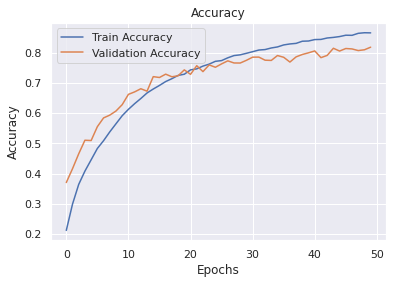

In [56]:
plt.plot(history_6_1.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_6_1.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Loss

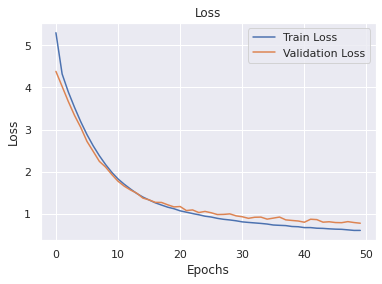

In [57]:
plt.plot(history_6_1.history['loss'], label = 'Train Loss')
plt.plot(history_6_1.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Đánh giá model

In [58]:
y_pred = model_6_1.predict(X_test_extra)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test_extra, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 82.37%


### **Bài 7.2**:
Hiện thực lại mô hình <font color='red'>**LeNET-5**</font> theo hướng dẫn ở mục 4. Cho biết kết quả độ chính xác.

<font color='red'>**LeNET-5 Architecture**</font>


<img src="https://cdn-images-1.medium.com/max/800/1*lvvWF48t7cyRWqct13eU0w.jpeg" width="800" alt="LeNET-5" />



#### Xây dựng mạng neural bằng keras

In [59]:
# Khởi tạo model
model_6_2 = Sequential() 

model_6_2.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', 
                     activation='relu',input_shape=(32,32,3), 
                     kernel_regularizer = l2 (0.01), 
                     bias_regularizer = l2 (0.01))) 
model_6_2.add(BatchNormalization()) 
model_6_2.add(AveragePooling2D(strides=2, pool_size=(2, 2))) 

model_6_2.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', 
                     activation='relu', 
                     kernel_regularizer = l2 (0.01), 
                     bias_regularizer = l2 (0.01))) 
model_6_2.add(BatchNormalization()) 
model_6_2.add(AveragePooling2D(strides=2, pool_size=(2, 2))) 

model_6_2.add(Flatten()) 
model_6_2.add(Dropout(0.5))
model_6_2.add(Dense(120, activation='relu')) 
model_6_2.add(Dense(84, activation='relu')) 
model_6_2.add(Dense(10, activation='softmax'))

In [60]:
model_6_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 6)         456       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 6)         24        
_________________________________________________________________
average_pooling2d_2 (Average (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 16)        2416      
_________________________________________________________________
batch_normalization_4 (Batch (None, 12, 12, 16)        64        
_________________________________________________________________
average_pooling2d_3 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)              

#### Huấn luyện model

In [61]:
# Compile model
Optimizer = Adam(learning_rate=3e-4)
Loss = CategoricalCrossentropy()
model_6_2.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [62]:
# Training model
history_6_2 = model_6_2.fit(X_train_extra, y_train_extra_new, 
                            validation_data=(X_dev_extra, y_dev_extra_new),
                            batch_size=128, epochs=100)

Epoch 1/100
352/352 [==============================] - 4s 9ms/step - loss: 2.0135 - accuracy: 0.3160 - val_loss: 1.7338 - val_accuracy: 0.4180
Epoch 2/100
352/352 [==============================] - 3s 8ms/step - loss: 1.6740 - accuracy: 0.4364 - val_loss: 1.5509 - val_accuracy: 0.4822
Epoch 3/100
352/352 [==============================] - 3s 8ms/step - loss: 1.5502 - accuracy: 0.4763 - val_loss: 1.5295 - val_accuracy: 0.4958
Epoch 4/100
352/352 [==============================] - 3s 7ms/step - loss: 1.4689 - accuracy: 0.5077 - val_loss: 1.7025 - val_accuracy: 0.4430
Epoch 5/100
352/352 [==============================] - 3s 7ms/step - loss: 1.3939 - accuracy: 0.5338 - val_loss: 1.3237 - val_accuracy: 0.5538
Epoch 6/100
352/352 [==============================] - 3s 7ms/step - loss: 1.3411 - accuracy: 0.5521 - val_loss: 1.2796 - val_accuracy: 0.5730
Epoch 7/100
352/352 [==============================] - 3s 7ms/step - loss: 1.2990 - accuracy: 0.5637 - val_loss: 1.3005 - val_accuracy: 0.5614

#### Visualization Loss & Accuracy

##### Accuracy

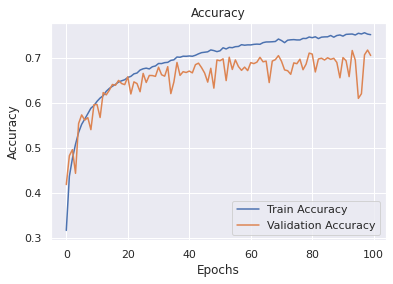

In [63]:
plt.plot(history_6_2.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_6_2.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Loss

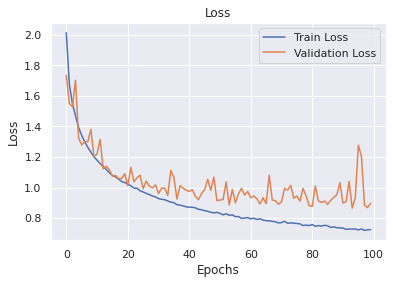

In [64]:
plt.plot(history_6_2.history['loss'], label = 'Train Loss')
plt.plot(history_6_2.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Đánh giá model

In [65]:
y_pred = model_6_2.predict(X_test_extra)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test_extra, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 70.78%


### **Bài 7.3**:
Hiện thực mạng <font color='red'>**AlexNET**</font> với bộ dữ liệu MNIST

Thông tin mạng như sau:

| STT | Tên | Thông số | Hàm activation |
| ----- | ----- | ----- | ----- |
| 1 | CONV2D | num filter: 96 <br/> size: 12x12 <br/> input shape: (28,28,1) <br/> padding:same <br/> strides: 4  | relu |
| 2 | MaxPooling2D | size: 3x3 <br/> padding:same <br/> strides: 2  |  |
| 3 | CONV2D | num filter: 256 <br/> size: 5x5 <br/> strides: 1  | relu |
| 4 | MaxPooling2D | size: 3x3 <br/> padding:same <br/> strides: 2  |  |
| 5 | CONV2D | num filter: 384 <br/> size: 3x3 <br/> padding:same <br/> strides: 1  | relu |
| 6 | CONV2D | num filter: 384 <br/> size: 3x3 <br/> padding:same <br/> strides: 1  | relu |
| 7 | CONV2D | num filter: 256 <br/> size: 3x3 <br/> padding:same <br/> strides: 1  | relu |
| 8 | MaxPooling2D | size: 3x3 <br/> padding:same <br/> strides: 2  |  |
| 9 | Dropout | p=0.5 |  |
| 10 | Dense | num unit = 4096 | relu |
| 11 | Dense | num unit = 4096 | relu |
| 12 | Dense | num unit = 10 | softmax |

Loss: CategoricalCrossentropy 

Optimizer: Adam

<font color='red'>**AlexNET Architecture**</font>


<img src="https://neurohive.io/wp-content/uploads/2018/10/AlexNet-1.png" width="800" alt="AlexNET" />


<img src="https://neurohive.io/wp-content/uploads/2018/10/Capture-12.jpg" width="800" alt="AlexNET" />


#### Xây dựng mạng neural bằng keras

In [66]:
# Khởi tạo model
model_6_3 = Sequential() 

model_6_3.add(Conv2D(filters=96, kernel_size=(11,11), padding='same', 
                     activation='relu',input_shape=(32,32,3), strides=(4,4), 
                     kernel_regularizer = l2 (0.01), 
                     bias_regularizer = l2 (0.01)))
model_6_3.add(BatchNormalization()) 
model_6_3.add(MaxPooling2D(strides=(2,2), pool_size=(3, 3), padding='same'))

model_6_3.add(Conv2D(filters=256, kernel_size=(5,5), padding='same',
                     activation='relu', strides=(1,1), 
                     kernel_regularizer = l2 (0.01), 
                     bias_regularizer = l2 (0.01)))
model_6_3.add(BatchNormalization()) 
model_6_3.add(Dropout(0.5))
model_6_3.add(MaxPooling2D(strides=(2,2), pool_size=(3, 3), padding='same'))

model_6_3.add(Conv2D(filters=384, kernel_size=(3,3), activation='relu', 
                     strides=(1,1), padding='same', 
                     kernel_regularizer = l2 (0.01), 
                     bias_regularizer = l2 (0.01))) 
model_6_3.add(BatchNormalization()) 
model_6_3.add(Dropout(0.5))

model_6_3.add(Conv2D(filters=384, kernel_size=(3,3), activation='relu', 
                     strides=(1,1), padding='same', 
                     kernel_regularizer = l2 (0.01), 
                     bias_regularizer = l2 (0.01))) 
model_6_3.add(BatchNormalization()) 
model_6_3.add(Dropout(0.5))

model_6_3.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', 
                     strides=(1,1), padding='same', 
                     kernel_regularizer = l2 (0.01), 
                     bias_regularizer = l2 (0.01))) 
model_6_3.add(BatchNormalization()) 
model_6_3.add(Dropout(0.5))
model_6_3.add(MaxPooling2D(strides=(2,2), pool_size=(3, 3), padding='same'))

model_6_3.add(Flatten()) 
model_6_3.add(Dropout(0.5))
model_6_3.add(Dense(4096, activation='relu')) 
model_6_3.add(Dropout(0.5))
model_6_3.add(Dense(4096, activation='relu')) 
model_6_3.add(Dropout(0.5))
model_6_3.add(Dense(10, activation='softmax'))

In [67]:
model_6_3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization_5 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_6 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 4, 256)         0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 2, 2, 256)        

#### Huấn luyện model

In [68]:
# Compile model
Optimizer = Adam(learning_rate=1e-4)
Loss = CategoricalCrossentropy()
model_6_3.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])

In [69]:
# Training model
history_6_3 = model_6_3.fit(X_train_extra, y_train_extra_new, 
                            validation_data=(X_dev_extra, y_dev_extra_new),
                            batch_size=64, epochs=30)

Epoch 1/30
704/704 [==============================] - 27s 35ms/step - loss: 12.2430 - accuracy: 0.1778 - val_loss: 10.1887 - val_accuracy: 0.2616
Epoch 2/30
704/704 [==============================] - 24s 34ms/step - loss: 8.4872 - accuracy: 0.2824 - val_loss: 7.0930 - val_accuracy: 0.2888
Epoch 3/30
704/704 [==============================] - 24s 34ms/step - loss: 5.6955 - accuracy: 0.3545 - val_loss: 4.7451 - val_accuracy: 0.3482
Epoch 4/30
704/704 [==============================] - 24s 35ms/step - loss: 3.8937 - accuracy: 0.4226 - val_loss: 3.4483 - val_accuracy: 0.3906
Epoch 5/30
704/704 [==============================] - 25s 35ms/step - loss: 2.8691 - accuracy: 0.4640 - val_loss: 2.5055 - val_accuracy: 0.4918
Epoch 6/30
704/704 [==============================] - 25s 35ms/step - loss: 2.3036 - accuracy: 0.4968 - val_loss: 2.7691 - val_accuracy: 0.4038
Epoch 7/30
704/704 [==============================] - 25s 35ms/step - loss: 1.9906 - accuracy: 0.5245 - val_loss: 2.0263 - val_accurac

#### Visualization Loss & Accuracy

##### Accuracy

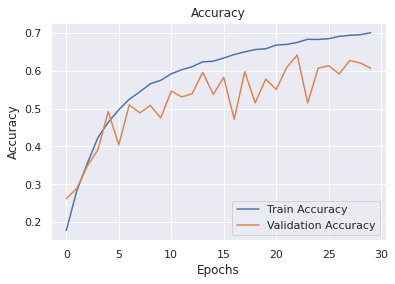

In [70]:
plt.plot(history_6_3.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_6_3.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Loss

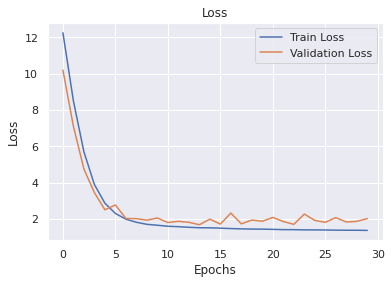

In [71]:
plt.plot(history_6_3.history['loss'], label = 'Train Loss')
plt.plot(history_6_3.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Đánh giá model

In [72]:
y_pred = model_6_3.predict(X_test_extra)
y_pred = np.argmax(y_pred, axis = -1)
accuracy = round(accuracy_score(y_test_extra, y_pred)*100,2)
print('Accuracy test = {}%'.format(accuracy))

Accuracy test = 60.76%
